# Deep Learning with NumPy

In [1]:
# Disable warnings messages
import sys 
import warnings 
import matplotlib.cbook 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

In [2]:
# Import Packages
import sklearn 
import numpy as np 
import pandas as pd 
from sklearn.datasets import load_digits 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [3]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data'snow" --iversions

pandas     1.0.1
matplotlib 3.1.3
sklearn    0.23.1
json       2.0.9
numpy      1.18.1
autopep8   1.4.4
Data'snow


In [4]:
# Loading MNIST with scikit-learn
mnist = load_digits()
X, y = mnist['data'], mnist['target']

In [5]:
print(X)
print(y)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


In [6]:
# Loading data from datasets 
treino = pd.read_csv('../../ia-lucas-dados/dados/train.csv')
teste = pd.read_csv('../../ia-lucas-dados/dados/test.csv')

In [7]:
treino.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
teste.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Splitt dataset trainning between input_values and target_value
range_class = np.arange(10)
# Coverting to array as flot type
y = np.asfarray(treino.iloc[:,0])
print(y)

[1. 0. 1. ... 7. 6. 9.]


In [10]:
# Adjusting datasets
treino_x = treino.iloc[:,1:].values 
# one-hot-encoding
treino_y = np.array([(range_class == label).astype(np.float) for label in y])
print(treino_x, treino_x.shape)
print(treino_y, treino_y.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] (42000, 784)
[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]] (42000, 10)


In [11]:
teste_x = teste.values

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64


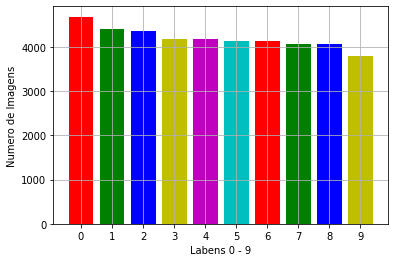

In [12]:
# visualizing data: Quantity of each lables
y = treino.iloc[:,0].value_counts()
print(y)
x = range(len(y))
plt.bar(x,y,color='rgbymc')
plt.xticks(x,x)
plt.ylabel('Numero de Imagens')
plt.xlabel('Labens 0 - 9')
plt.grid()

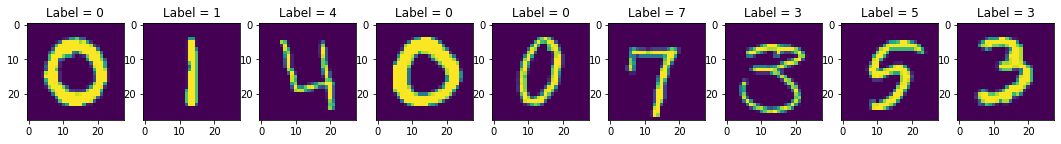

In [13]:
# Criando uma figura para exibir imagens em padrão de linhas e colunas (1 x 10)
figure = plt.figure()

# Definir manualmente a largura e a altura da figura
figure.set_size_inches(20.5, 8.5)

# Configurando uma imagem em cada figura com um título para o rótulo da imagem
for itr in range(1, 10):
    plt.subplot(1, 10, itr)
    label = treino.loc[itr,'label']
    pixels = treino.iloc[itr,1:].values.reshape((28,28))
    plt.title('Label = {label}'.format(label = label))
    plt.imshow(pixels)

# Exibindo toda a imagem presente na figura
plt.show()

In [14]:
# Normalizing Input Data
treino_x = treino_x/255.
teste_x = teste_x/255.

In [15]:
# Visualizing shape data 
shape_x = treino_x.shape
shape_y = treino_y.shape

# Total of registers 
total = treino_y.shape[0]

# Print
print ('O shape de X é:', (shape_x))
print ('O shape de Y é: ' + str(shape_y))
print ('Temos %d exemplos de treinamento!' % (total))

O shape de X é: (42000, 784)
O shape de Y é: (42000, 10)
Temos 42000 exemplos de treinamento!


In [16]:
# Creating Network
# Size of layers 
def layer_size(X, Y):
    
    n_x = X.shape[1]
    n_h = 4
    n_y = Y.shape[1]
    
    return (n_x, n_h, n_y)

In [17]:
# Initializing Parameters
def initialise_parameter(n_x, n_h, n_y):
    
    np.random.seed(0)
    
    W1 = np.random.randn(n_h[0], n_x) * 0.1
    b1 = np.zeros(shape = (n_h[0], 1))
    
    W2 = np.random.randn(n_h[1], n_h[0]) * 0.1
    b2 = np.zeros(shape = (n_h[1], 1))
    
    W3 = np.random.randn(n_y, n_h[1]) * 0.1
    b3 = np.zeros(shape = (n_y, 1))
    
    assert(W1.shape == (n_h[0], n_x))
    assert(b1.shape == (n_h[0], 1))

    assert(W2.shape == (n_h[1], n_h[0]))
    assert(b2.shape == (n_h[1], 1))
    
    assert(W3.shape == (n_y, n_h[1]))
    assert(b3.shape == (n_y, 1))
    
    parameters = {"W1": W1, 
                  "b1": b1, 
                  "W2": W2, 
                  "b2": b2, 
                  "W3": W3, 
                  "b3": b3
                 }
    
    return parameters

In [18]:
# Activation Function
# Math operation to prevent negative values pass, and make a crush in output values
# The crushing functions limit the output to a range between 0 and 1, making these 
# functions useful in predicting probabilities.

# Sigmoid Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

[-5.         -4.8989899  -4.7979798  -4.6969697  -4.5959596  -4.49494949
 -4.39393939 -4.29292929 -4.19191919 -4.09090909 -3.98989899 -3.88888889
 -3.78787879 -3.68686869 -3.58585859 -3.48484848 -3.38383838 -3.28282828
 -3.18181818 -3.08080808 -2.97979798 -2.87878788 -2.77777778 -2.67676768
 -2.57575758 -2.47474747 -2.37373737 -2.27272727 -2.17171717 -2.07070707
 -1.96969697 -1.86868687 -1.76767677 -1.66666667 -1.56565657 -1.46464646
 -1.36363636 -1.26262626 -1.16161616 -1.06060606 -0.95959596 -0.85858586
 -0.75757576 -0.65656566 -0.55555556 -0.45454545 -0.35353535 -0.25252525
 -0.15151515 -0.05050505  0.05050505  0.15151515  0.25252525  0.35353535
  0.45454545  0.55555556  0.65656566  0.75757576  0.85858586  0.95959596
  1.06060606  1.16161616  1.26262626  1.36363636  1.46464646  1.56565657
  1.66666667  1.76767677  1.86868687  1.96969697  2.07070707  2.17171717
  2.27272727  2.37373737  2.47474747  2.57575758  2.67676768  2.77777778
  2.87878788  2.97979798  3.08080808  3.18181818  3

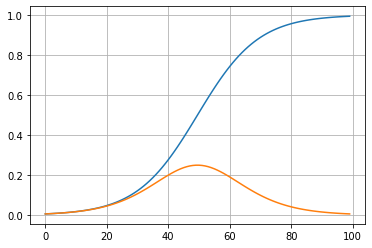

In [19]:
# Representação gráfica da função sigmoide
_x = np.linspace(-5, 5, 100)
print(_x)
plt.plot(sigmoid(_x))
plt.plot(sigmoid_derivative(sigmoid(_x)))
plt.grid()

In [20]:
# Function to make Forward Propagation
def forward_propagation(X, parameters):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    # Input Layer
    Z1 = (np.dot(W1, X.T) + b1).T
    
    # Activation Function
    A1 = sigmoid(Z1)
    
    # First Hidden Layer
    Z2 = (np.dot(W2, A1.T) + b2).T
    
    # Activation Function
    A2 = sigmoid(Z2) 
    
    # Second Hidden Layer 
    Z3 = (np.dot(W3, A2.T) + b3).T
    
    # Activation Function
    A3 = sigmoid(Z3)
    
    assert(A3.shape == (X.shape[0], 10))
    
    cache = {
        "Z1" : Z1,
        "A1" : A1,
        "Z2" : Z2,
        "A2" : A2,
        "Z3" : Z3,
        "A3" : A3
    }

    return A3, cache

In [21]:
# Cost function
def compute_cost(A3, Y):
    
    # Number of register Y
    m = Y.shape[0]
    
    # Log probabilites calculated
    logprobs = np.multiply(Y, np.log(A3)) + np.multiply((1 - Y), np.log(1 - A3))
    
    # Cost
    cost = - np.sum(logprobs) / m 
    
    # Ajuste do formato dos dados
    cost = float(np.squeeze(cost))
    
    assert(isinstance(cost, float))
    
    return cost

In [22]:
# Backward Propagation
def backward_propagation(parameters, cache, X, Y):
    
    # Shape de Y
    m = Y.shape[0]
    
    # Extrai do "cache" os valores da saída de cada ativação
    A1 = cache["A1"]
    A2 = cache["A2"]
    A3 = cache["A3"]
    
    # Extrai os parâmetros
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    W3 = parameters["W3"]
    
    # Calcula a derivada do custo (perceba que estamos calculando na sequência inversa ao forward propagation)
    dZ3 = (A3 - Y)
    dW3 = (1 / m) * np.dot(dZ3.T, A2)
    db3 = (1 / m) * np.sum(dZ3, keepdims = True)

    dZ2 = np.multiply(np.dot(dZ3, W3), sigmoid_derivative(A2))
    dW2 = (1 / m) * np.dot(dZ2.T, A1)
    db2 = (1 / m) * np.sum(dZ2, keepdims = True)
    
    dZ1 = np.multiply(np.dot(dZ2, W2), sigmoid_derivative(A1))
    dW1 = (1 / m) * np.dot(dZ1.T, X)
    db1 = (1 / m) * np.sum(dZ1, keepdims = True)
    
    # Dicionário de gradientes
    grads = {"dW1": dW1, 
             "db1": db1, 
             "dW2": dW2, 
             "db2": db2, 
             "dW3": dW3, 
             "db3": db3
            }
    
    return grads

In [23]:
# Update Value of Weights using Gradient Descent
def update_parameters(parameters, grads, learning_rate):
    
    # Extrai os pesos
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    # Extrai os gradientes
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    dW3 = grads["dW3"]
    db3 = grads["db3"]
    
    # Multiplica os gradientes pela taxa de aprendizagem e então subtrai do valor do coeficiente
    # O gradiente define a direção da mudança (positiva ou negativa)
    # A taxa de aprendizagem define a magnitude (mudança maior ou menor)
    W1 = W1 - (learning_rate * dW1)
    b1 = b1 - (learning_rate * db1)
    W2 = W2 - (learning_rate * dW2)
    b2 = b2 - (learning_rate * db2)
    W3 = W3 - (learning_rate * dW3)
    b3 = b3 - (learning_rate * db3)
    
    # Novo dicionário de parâmetros
    parameters = {"W1": W1, 
                  "b1": b1, 
                  "W2": W2, 
                  "b2": b2, 
                  "W3": W3, 
                  "b3": b3
                 }
    
    return parameters

In [24]:
def predict(X, parameters):
    
    m = X.shape[0]
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    A3, cache = forward_propagation(X, parameters)
    
    return A3

In [25]:
# Neural Network Model
def nn_model(X, Y, n_h, learning_rate, num_iterations, print_cost = False):

    # Para reproduzir sempre os mesmos resultados
    np.random.seed(3)

    # Lista para o custo em cada iteração
    cost_per_iter = []
    
    # Tamanho das camadas
    n_x = layer_size(X, Y)[0]
    n_y = layer_size(X, Y)[2]
    
    # Inicialização dos parâmetros
    parameters = initialise_parameter(n_x, n_h, n_y)
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation. Inputs: "X, pesos". Outputs: "A2, cache".
        A3, cache = forward_propagation(X, parameters)
        
        # Função de custo. Inputs: "A2, Y, pesos". Outputs: "custo".
        cost = compute_cost(A3, Y)
 
        # Grava o custo por iteração
        cost_per_iter.append(cost)

        # Backpropagation. Inputs: "pesos, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters, cache, X, Y)
 
        # Gradient descent. Inputs: "pesos, grads". Outputs: "pesos".
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Imprime o custo a cada 100 iterações
        if print_cost and i % 100 == 0:
            print ("Custo após iteração %i: %f" %(i, cost))
    
    # Previsão em treino
    train_prediction = (treino.iloc[:,0].values != np.array(predict(treino_x, parameters).argmax(axis = 1)).T).astype(int)

    # Previsão em teste
    test_prediction = np.vstack((np.arange(1,28001), predict(teste_x, parameters).argmax(axis = 1).T)).T
    
    # Dados para submeter ao Kaggle mais tarde (opcional)
    data_to_submit = pd.DataFrame(test_prediction, columns = ['ImageId','Label']) 
    
    # Print
    print("Acurácia em Treino: {} %".format(100 - np.mean(train_prediction) * 100))
    
    # Saída
    output = {
        "cost" : cost_per_iter[-1],
        "parameters" : parameters,
        "cost_per_iter" : cost_per_iter,
        "train_prediction" : train_prediction,
        "test_prediction" : test_prediction,
        "data_to_submit" : data_to_submit
    }
    
    return output

Taxa de Aprendizado = 2.1
Custo após iteração 0: 6.616198
Custo após iteração 100: 1.916392
Custo após iteração 200: 0.918496
Custo após iteração 300: 0.628917
Custo após iteração 400: 0.462131
Custo após iteração 500: 0.356310
Custo após iteração 600: 0.289786
Custo após iteração 700: 0.243155
Custo após iteração 800: 0.207463
Custo após iteração 900: 0.181343
Custo após iteração 1000: 0.155176
Custo após iteração 1100: 0.135424
Custo após iteração 1200: 0.123430
Custo após iteração 1300: 0.109187
Custo após iteração 1400: 0.098050
Custo após iteração 1500: 0.088513
Acurácia em Treino: 99.2547619047619 %
O custo é: 0.0802831527782699
-------------------------------------------------------



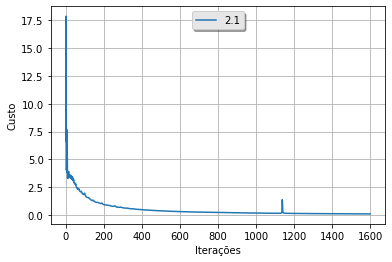

In [26]:
models = {}
learning_rates = [2.1]

# Loop de treinamento
for i in learning_rates:
    
    # Print
    print ("Taxa de Aprendizado = " + str(i))
    
    models[str(i)] = nn_model(treino_x, 
                              treino_y, 
                              n_h = [400, 40], 
                              learning_rate = i, 
                              num_iterations = 1600, 
                              print_cost = True)
    
    
    print ("O custo é: " + str(models[str(i)]["cost"]))
    print ("-------------------------------------------------------" + '\n')

# Plot do custo por iteração
for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["cost_per_iter"]), label = str(i))

# Plot
plt.ylabel('Custo')
plt.xlabel('Iterações')
legend = plt.legend(loc = 'upper center', shadow = True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.grid()
plt.show()

In [29]:
# Salvando o resultado para submeter ao Kaggle
models["2.1"]["data_to_submit"].to_csv('submit_2_1.csv', index = False)